In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
data_path=r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 4/04-2024 Instacart Basket Analysis/'

In [3]:
#importing all merged dataset
ord_prods_custs_depts = pd.read_pickle(os.path.join(data_path,'02 Data','Prepared Data','ord_prods_custs_depts.pkl'))

### Continueing from question 3 of key questions

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [7]:
ord_prods_custs_depts['prices'].agg(['min','mean','max'])

min         1.000000
mean       11.980226
max     99999.000000
Name: prices, dtype: float64

In [43]:
# first creating a price range
ord_prods_custs_depts.loc[(ord_prods_custs_depts['prices'] >= 0) & (ord_prods_custs_depts['prices'] <= 5),'price_groups'] = 'Low-price-range'
ord_prods_custs_depts.loc[(ord_prods_custs_depts['prices'] >= 6) & (ord_prods_custs_depts['prices'] <= 15),'price_groups'] = 'Mid-price-range'
ord_prods_custs_depts.loc[(ord_prods_custs_depts['prices'] >= 16) & (ord_prods_custs_depts['prices'] <= 80),'price_groups'] = 'High-price-range'
ord_prods_custs_depts.loc[(ord_prods_custs_depts['prices'] > 80),'price_groups'] = 'abnormal_price'

In [44]:
ord_prods_custs_depts['price_groups'].value_counts(dropna = False)

price_groups
Mid-price-range     19685824
Low-price-range     12326002
High-price-range      387906
abnormal_price          5127
Name: count, dtype: int64

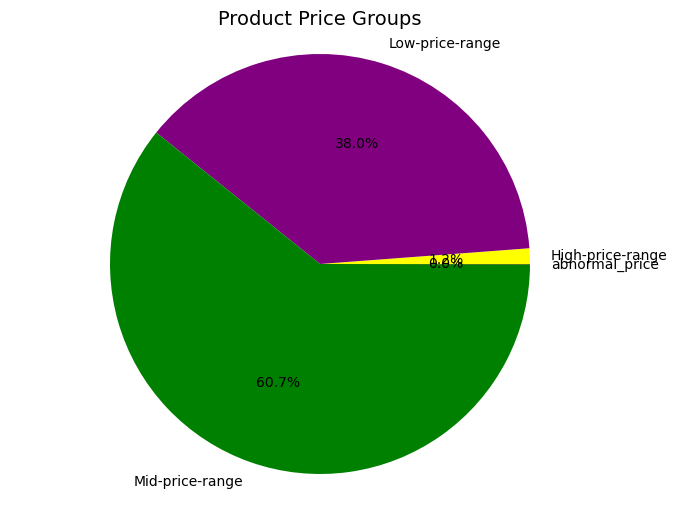

In [46]:
price_groups = (ord_prods_custs_depts['price_groups'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(price_groups, labels = price_groups.index, autopct='%1.1f%%', colors=['yellow','purple', 'green','red','orange'])
plt.title('Product Price Groups', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'pie_product_price_groups_dis.png'))

In [52]:
# ordering habbits based on customer loyalty 
loyalty_ordering = ord_prods_custs_depts.groupby(['loyalty_flag'])['order_number'].mean()

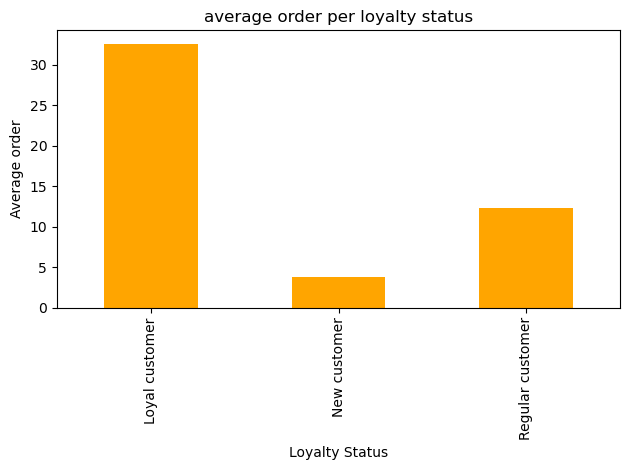

In [53]:
bar_avg_order_loyalty = loyalty_ordering.sort_index().plot.bar(color='orange')
plt.title('average order per loyalty status')
plt.ylabel('Average order')
plt.xlabel('Loyalty Status')
plt.tight_layout()

In [54]:
bar_avg_order_loyalty.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'avg_ord_per_loyalty_status.png'))